## Implementing K-Nearest Neighbours for Flower Classification

In this notebook, we will implement a kNN (k-Nearest Neighbour) algorithm to help us classify flower species.

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
X, y = datasets.load_iris(return_X_y=True)

In [8]:
test_size = 25
## Randomly shuffle data
np.random.seed(1984)
mask = np.random.permutation(range(len(X)))
X = X[mask]
y = y[mask]
## Assign to training and testing sets
X_train = X[test_size:]
y_train = y[test_size:]
X_test = X[:test_size]
y_test = y[:test_size]
# alternative ways such as sklearn.model_selection.train_test_split exist

In [9]:
def knn_predict(X_train, y_train, X_test, k=5):
    ## Initialize an empty array to hold predictions
    predictions = np.zeros(X_test.shape[0])
    for i, x in enumerate(X_test):
        ## Calculate squared (L2) distances between the test example and train set
        l2 = np.sum(np.square(X_train - x), axis=1)
        ## Sort the distances in descending order to pick the k nearest neighbours
        sort_index = np.argsort(l2, axis=0) 
        neighbours = y_train[sort_index[0:k]]
        ## Perform voting amongst the k neighbours to determine the class
        classes, counts = np.unique(neighbours, return_counts=True)
        predictions[i]= classes[np.argmax(counts)]
    return predictions

In [10]:
## Function to help us evaluate accuracy
def accuracy(prediction, actual):
    return np.sum(prediction == actual)/len(prediction)

In [11]:
## Use the training set to predict classes of flowers for the test set
prediction = knn_predict(X_train, y_train, X_test,k=10)
print("Accuracy on Test Set: {:.2f}%".format(accuracy(prediction, y_test)*100))

Accuracy on Test Set: 96.00%


Text(0, 0.5, 'Accuracy')

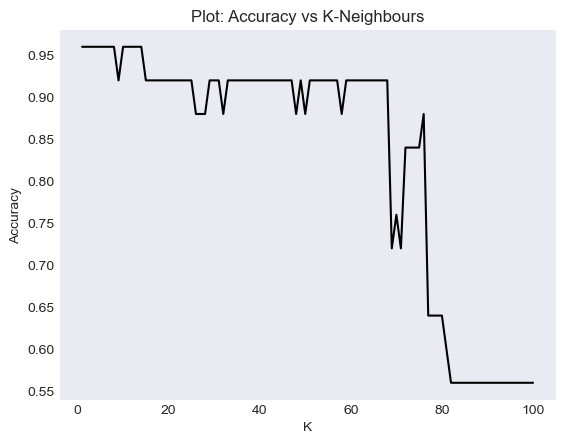

In [12]:
## Try out a range of k's
max_k = 100
preds = []
for i in range(max_k):
    preds.append(accuracy(knn_predict(X_train,y_train,X_test,k=i+1),y_test))
plt.plot(list(range(1,max_k+1)), preds, color="black",linewidth=1.5)
plt.title("Plot: Accuracy vs K-Neighbours")
plt.xlabel("K")
plt.ylabel("Accuracy")